# COVID-19 Healthy Diet Dataset

*CSMODEL S13 - Group 11: Philipe Chan, Gio Gerardino, Jaira Santos*

# I. Dataset Description

## About the Dataset

The **Food Supply Quantity** dataset was created in 2020, right as the COVID-19 pandemic was just emerging to be a global health crisis. During this period, the exponentially rising number of cases of COVID-19 became a huge challenge for doctors, nurses, paramedics and thousands of medical workers, as they have placed their lives on the frontline to save a number patients who are infected. With this in mind, the researcher/author sought to identify methods by which people might help in protecting each another amidst the pandemic—one of which, would be **adopting healthy diets** as a means of looking after oneself and one's family. 

## Collection Process 


The author obtained the data for different food group supply quantities, nutrition values, obesity, and undernourished percentages from Food and Agriculture Organization of the United Nations FAO website. The population count from each country was acquired from the Population Reference Bureau Website while the COVID-19 confirmed, deaths, recovered and active cases came from CSSE Website.

## Import

Import **pandas**, **plotly.express**, and **scipy.stats**.

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import scipy.stats as stats

food_df = pd.read_csv("Food_Supply_Quantity_kg_Data.csv")
food_desc = pd.read_csv("Supply_Food_Data_Descriptions.csv")

## Structure of the Dataset File

- The **rows** in the dataset represent the combined data of food categories intake, national population obesity and undernourished rates, national COVID-19 cases (confirmed, deaths, recovered, active), and population counts of **countries** around the world.
- The **columns** represent the countries of the observations, and the food-supply related variables pertaining to the intake of certain food groups, such as grains, vegetables, fruits, and proteins, among others.  Additionally, variables representing the national obesity and undernutrition rates, COVID-19 confirmed cases, deaths, recovered cases, active cases, and country population counts are included. With the exception of the country name and the population count, each of these variables is represented as a **percentage**.
- There are a total of **170 observations and 32 variables** in the dataset.

## Variables

- The first variable represents the country of an observation.
- The succeeding 23 variables in the dataset represent the various **food categories** that individuals consume in each country.
- Meanwhile, the 24th and 25th variables represent the **percentages of obese and undernourished people in each country**, respectively.
- Finally, the remaining 6 variables of the dataset represent the **proportion of confirmed COVID-19 cases, deaths, recovered cases, active COVID-19 cases, population counts of each country, and the unit used for each of the variables (with the exception of the population)**.


More comprehensive descriptions of each variable in the dataset are listed below:
  - **Country:** Countries around the world
  - **Alcoholic Beverages:** Percentage of food intake (kg) alcoholic beverages
  - **Animal Fats:** Percentage of food intake (kg) animal fats
  - **Animal Products:** Percentage of food intake (kg) animal products
  - **Aquatic Products, Other:** Percentage of food intake (kg) aquatic products
  - **Cereals — Excluding Beer:** Percentage of food intake (kg) cereals — excluding beer
  - **Eggs:** Percentage of food intake (kg) eggs
  - **Fish, Seafood:** Percentage of food intake (kg) fish, seafood
  - **Fruits — Excluding Wine:** Percentage of food intake (kg) fruits — excluding wine
  - **Meat:** Percentage of food intake (kg) meat
  - **Milk — Excluding Butter:** Percentage of food intake (kg) milk — excluding butter
  - **Miscellaneous:** Percentage of food intake (kg) miscellaneous
  - **Offals:** Percentage of food intake (kg) offals
  - **Oilcrops:** Percentage of food intake (kg) oilcrops
  - **Pulses:** Percentage of food intake (kg) pulses
  - **Spices:** Percentage of food intake (kg) spices
  - **Starchy Roots:** Percentage of food intake (kg) starchy roots
  - **Stimulants:** Percentage of food intake (kg) stimulants
  - **Sugars & Sweeteners:** Percentage of food intake (kg) sugars and sweeteners
  - **Sugar Crops:** Percentage of food intake (kg) sugar crops
  - **Treenuts:** Percentage of food intake (kg) treenuts
  - **Vegetable Oils:** Percentage of food intake (kg) vegetable oils
  - **Vegetables:** Percentage of food intake (kg) vegetables
  - **Vegetal Products:** Percentage of food intake (kg) vegetal products
  - **Obesity:** Obesity rate of the population
  - **Undernourished:** Undernourished rate of the population
  - **Confirmed:** Percentage of confirmed COVID-19 cases of the population
  - **Deaths:** Percentage of COVID-19 deaths of the population
  - **Recovered:** Percentage of COVID-19 recovered of the population
  - **Active:** Percentage of COVID-19 active cases of the population
  - **Population:** Population count of the country
  - **Unit (all except Population):** Unit for data (%)

Show the contents of the `Food Description` which contains:

   - **Category:** the different categories of food; and
   - **Items:** the different types of food that belong to each category.

In [3]:
food_desc

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic;..."
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish,..."
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovin..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat,..."
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."
5,Eggs,Eggs
6,"Fish, Seafood",Cephalopods; Crustaceans; Demersal Fish; Fresh...
7,Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; D..."
8,Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; ..."
9,Milk - Excluding Butter,Milk - Excluding Butter


Show the contents of the `Food DataFrame` which contains the combined data of various food categories intake, world population obesity and undernourished rates, national COVID-19 cases (confirmed, deaths, recovered, active), and population counts of countries around the world.

In [4]:
food_df

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


Display Food Dataset info using the `info` function.

In [5]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

Display Food Dataset description using the `describe` function.

In [6]:
food_df.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,...,0.117474,0.851554,6.085912,37.814834,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,...,0.146143,0.445335,3.560148,5.852943,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,...,0.000000,0.091500,0.857000,23.113200,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,...,0.020750,0.507700,3.616500,33.552775,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,...,0.079950,0.774450,5.028100,37.900700,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,...,0.148650,1.070900,7.801650,42.762775,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,...,0.756900,2.202600,19.299500,48.258500,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


# II. Data Cleaning

In this section of the notebook, the researchers have employed different preprocessing techniques in order to address certain inconsistencies within the dataset. For each of the **used variables** in the study, the researchers specifically checked for the following:

- **Multiple representations** of the same categorical value;
- Correctness of the **datatype** of the variable;
- Set **default values** of the variable;
- **Missing data**;
- **Duplicate data**; and
- **Inconsistent formatting** of values.

## Checking for Multiple Representations of the Same Categorical Value

The single categorical variable relevant in this phase of the analysis would be the one representing the **countries**. With this, the researchers ought to identify the unique countries currently represented in the dataset.

In [7]:
food_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq

Get the total number of unique countries in the `Food Dataframe` using the nunique() function.

In [8]:
food_df['Country'].nunique()

170

The `Food Dataframe` information presented in the previous section indicates that the total number of entries present in the dataframe is **170**. Since the number of unique country values (170) match with the total number of entries in the dataframe, the researchers have determined that **all the countries represented in the `Food Dataframe` are unique.**

## Checking for Correctness of the Datatypes of Each Variable

As can be seen in the previous section, upon calling the info() function on the Food Dataset, the only variables that **are not** of type **float64** are **Country, Undernourished, and Unit (all except Population)**. Having observed this, the researchers then decided to explore the unique values found under each variable.

It has only recently been observed that the data type "object" is appropriate for the values under the **Country** variable. Country names are strings, and since **strings are by default stored as the object data type, there is no cleaning needed for this column.**

The researchers then proceeded to explore the values under the **Undernourished** variable. First, we try to obtain the **counts of unique values**.

In [9]:
food_df['Undernourished'].value_counts()

<2.5    44
16.5     3
7.1      3
2.7      3
6.2      3
        ..
15.2     1
10.2     1
10.5     1
4.2      1
51.3     1
Name: Undernourished, Length: 98, dtype: int64

As seen above, the values in the **Undernourished** column appear to be of various datatypes, with the string "<2.5" making up the majority of the values. Given that this column shows the **rate** of undernourished people in a certain country, the expected datatype for this field is **float**. Consequently, the datatype **object** has been evaluated by the researchers as being unsuitable for this variable.

That being said, preprocessing and cleaning will be required for the **Undernourished** variable in order to guarantee that the datatype for the column is consistent across all values.

Next, the researchers have chosen to investigate the data under the **Unit (all except Population)** variable.

In [10]:
food_df['Unit (all except Population)'].value_counts()

%    170
Name: Unit (all except Population), dtype: int64

The researchers have decided to drop the `Unit (all except Population)` column since it merely contains the symbol `%` for all the observations in the dataset, denoting the unit for all the variables of an observation excluding the variable `Population`. It does not provide any information that may help in the analysis of the dataset later on.

In [11]:
# Drop 'Unit (all except Population)' column

food_df = food_df.drop('Unit (all except Population)', axis=1)

The researchers have determined that the remaining variables, which represent the combined data of food category intake, national obesity rates, and national COVID-19 cases (confirmed, deaths, recovered, and active), have an appropriate datatype of **float** because the unit of measurement for these variables is of type `%`. The datatype **float** is also suitable for the **Population** count because it nevertheless provides numerical data. That being said, there is **no requirement for preprocessing the aforementioned variables' datatypes.**

## Checking for Inconsistent Formatting of Values

When the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function was called earlier, it can seen in the `Dtype` column of the variable `Undernourished` that it is labeled as `object` when it should be `float64`—similar to its counterpart variable `Obesity`. Hence, upon calling the `value_counts` function, `<2.5` is identified to be the culprit to the misidentified datatype of the variable `Undernourished`.

In [12]:
food_df['Undernourished'].value_counts()

<2.5    44
16.5     3
7.1      3
2.7      3
6.2      3
        ..
15.2     1
10.2     1
10.5     1
4.2      1
51.3     1
Name: Undernourished, Length: 98, dtype: int64

The researchers have, thus, decided to replace every value of `<2.5` with `2.4` instead, and assigning it with the datatype `float64`.

In [13]:
# Replace '< 2.5' values in 'Undernoursihed' column to '2.4'

food_df['Undernourished'] = food_df['Undernourished'].replace('<2.5', '2.4')
food_df['Undernourished'] = food_df['Undernourished'].astype(float)

It can now be seen below that the variable `Undernourished` is of datatype `float64`, and `<2.5` has been replaced with `2.4` for all the 43 times it appeared under the variable `Undernourished` in the dataset.

In [14]:
food_df['Undernourished'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 170 entries, 0 to 169
Series name: Undernourished
Non-Null Count  Dtype  
--------------  -----  
163 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB


In [15]:
food_df['Undernourished'].value_counts()

2.4     44
16.5     3
7.1      3
2.7      3
6.2      3
        ..
15.2     1
10.2     1
10.5     1
4.2      1
51.3     1
Name: Undernourished, Length: 98, dtype: int64

## Checking for `NaN`s
We will now handle missing data in our dataset. Let us check each variable if it contains a `NaN` / `null` value. We'll use the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`any`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions for this. This function call will list each variable with a boolean value indicating if the variable contains a `NaN` / `null` value.

In [16]:
food_df.isnull().any()

Country                     False
Alcoholic Beverages         False
Animal fats                 False
Animal Products             False
Aquatic Products, Other     False
Cereals - Excluding Beer    False
Eggs                        False
Fish, Seafood               False
Fruits - Excluding Wine     False
Meat                        False
Milk - Excluding Butter     False
Miscellaneous               False
Offals                      False
Oilcrops                    False
Pulses                      False
Spices                      False
Starchy Roots               False
Stimulants                  False
Sugar & Sweeteners          False
Sugar Crops                 False
Treenuts                    False
Vegetable Oils              False
Vegetables                  False
Vegetal Products            False
Obesity                      True
Undernourished               True
Confirmed                    True
Deaths                       True
Recovered                    True
Active        

Let's get the list of columns with `NaN` / `null` values.

In [17]:
nan_variables = food_df.columns[food_df.isnull().any()].tolist()
print(nan_variables)

['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active']


For each variable, show the total number of observations with `NaN` / `null` value. The [`sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function is used to get the counts of null values per column.

In [18]:
food_df[nan_variables].isnull().sum()

Obesity           3
Undernourished    7
Confirmed         6
Deaths            6
Recovered         6
Active            8
dtype: int64

Since we see that there is a very small number of observations with `NaN` / `null` value for these variable, we can decide to drop those observations from the dataset.

In [19]:
food_df = food_df.dropna()

Display the dimensions of the `Food Dataframe` and the number of null observations from each variable.

In [20]:
print (food_df.shape)
food_df.isnull().sum()

(154, 31)


Country                     0
Alcoholic Beverages         0
Animal fats                 0
Animal Products             0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar & Sweeteners          0
Sugar Crops                 0
Treenuts                    0
Vegetable Oils              0
Vegetables                  0
Vegetal Products            0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64

# III. Exploratory Data Analysis (EDA)

This section of the notebook is focuses on the research team's area of interest, which includes discovering and establishing connections between the **mortality, death, undernutrition, and obesity rates in various countries**. This focus also looks for **potential patterns in the food consumption of countries** with comparable rates of obesity, undernutrition, death, and mortality.

## *EDA #1* - Which Countries Have the Highest Death and Mortality Rates?

The first EDA question seeks to identify the **top five countries with the highest death and mortality rates**—as a foundation for identifying potential patterns within their obesity rates, undernutrition rates, and food consumptions in later portions of the analysis.

To do this, the researchers first need to create a new variable named `Mortality`, so as to measure the proportion of deaths resulting from the total number of confirmed COVID-19 cases per country.

In [21]:
# Create a Mortality column to measure of the frequency of occurrence of COVID-19 deaths

food_df['Mortality'] = food_df['Deaths'] / food_df['Confirmed']*100

Next, to identify the **top 5 countries with the highest death rates**, we plot the death rates of each country in a bar graph, sorted in descending order.

In [22]:
# Figure to present the Death rates of each country, sorted in descending order

deaths = px.bar(food_df, x='Country', y='Deaths').update_xaxes(categoryorder="total descending")
deaths.show()

Upon analyzing the graph above, the researchers discovered that the top 5 countries with the highest death rates are **Belgium, Slovenia, United Kingdom, Czechia, and Italy**. Provided below are the precise death rates of the aforementioned countries:

In [23]:
# Get the countries with highest death rates by sorting the dataframe in descending order
top_5_deaths = food_df.sort_values(by='Deaths', ascending=False, inplace=False)

# Get the top 5
top_5_deaths = top_5_deaths.head(5)

# Represent in percentage
top_5_deaths.iloc[:,[0,27]]

,Country,Deaths
14,Belgium,0.185428
138,Slovenia,0.171755
159,United Kingdom,0.167220
38,Czechia,0.159845
74,Italy,0.150927


Top 5 Countries with the Highest Death Rates:

- **Belgium:** 0.19%
- **Slovenia:** 0.17%
- **United Kingdom:** 0.17%
- **Czechia:** 0.16%
- **Italy:** 0.15%

Get the statistical summary of the `Deaths` variable by calling the function `describe()`

In [24]:
food_df['Deaths'].describe()

count    154.000000
mean       0.039882
std        0.049285
min        0.000000
25%        0.002086
50%        0.012576
75%        0.069680
max        0.185428
Name: Deaths, dtype: float64

In [25]:
# Get the mean and std
mean = food_df['Deaths'].mean()
std = food_df['Deaths'].std()

# Get the coefficient of variation
cv = std / mean

print("Coefficient of Variation:",cv)

Coefficient of Variation: 1.2357759652791964


Based on the data above, the researchers may state the following:
- `Average death rate` of the countries is 0.04
- `Standard deviation` of death rates is 0.0493 

The `coefficient of variation` indicates that the death rates are widely spread out across different values.

Next, to identify the **top 5 countries with the highest mortality rates**, we plot the mortality rates of each country in a bar graph, sorted in descending order.

In [26]:
# Figure to present the Mortality rates of each country, sorted in descending order

mortality = px.bar(food_df, x='Country', y='Mortality').update_xaxes(categoryorder="total descending")
mortality.show()

Upon analyzing the graph above, the researchers discovered that the top 5 countries with the highest mortality rates are **Yemen, Mexico, Sudan, Ecuador, and Egypt**. Provided below are the precise mortality rates of the aforementioned countries:

In [27]:
# Get the countries with highest mortality rates by sorting the dataframe in descending order
top_5_mortality = food_df.sort_values(by='Mortality', ascending=False, inplace=False)

# Get the top 5
top_5_mortality = top_5_mortality.head(5)
top_5_mortality.iloc[:,[0,31]]

,Country,Mortality
167,Yemen,28.913963
100,Mexico,8.607431
143,Sudan,6.178714
43,Ecuador,5.835521
44,Egypt,5.679278


Top 5 Countries with the Highest Mortality Rates:

- **Yemen:** 28.91%
- **Mexico:** 8.61%
- **Sudan:** 6.17%
- **Ecuador:** 5.84%
- **Egypt:** 5.68%

In [28]:
food_df['Mortality'].describe()

count    154.000000
mean       2.136832
std        2.555027
min        0.000000
25%        1.074886
50%        1.737793
75%        2.541429
max       28.913963
Name: Mortality, dtype: float64

In [29]:
# Get the mean and std
mean = food_df['Mortality'].mean()
std = food_df['Mortality'].std()

# Get the coefficient of variation
cv = std / mean

print("Coefficient of Variation:",cv)

Coefficient of Variation: 1.1957080415576813


Based on the data above, the researchers may state the following:
- `Average mortality rate` of the countries is 2.14 
- `Standard deviation` of mortality rates is 2.56

The `coefficient of variation` indicates that the mortality rates are widely spread out across different values.

The researchers made use of **bar graphs** and **statistical summaries** such as the mean, standard deviation, and coefficient of variation to analyze the mortality and death rates of the countries.

As can be observed in the data presented above, having a `high death rate` does not necessarily translate into a `high mortality rate`. The `death rate` of a country is merely a proportion of how much people from the population have actually died from COVID-19, whereas the `mortality rate` is the ratio of total deaths that have occurred among the confirmed COVID-19 cases, during 2020. That being said, countries with high `death rates`, more specifically, **Belgium, Slovenia, United Kingdom, Czechia, and Italy**, only serve to highlight how far ahead of other nations they are in terms of the overall proportion of COVID-19 deaths. Conversely,  countries with high `mortality rates`—more specifically, **Yemen, Mexico, Sudan, Ecuador, and Egypt**—are countries that present higher risks of dying if one were to contract COVID-19. 

In addition to this, the researchers also found that the death and mortality rates of countries in the `Food DataFrame` are very much varied, given how the `coefficient of variation` of both death and mortality rates are greater than 1 (1.24 and 1.20, respectively). A coefficient of variation greater than 1 indicates a relatively high variability in the dataset.

## *EDA #2* - What is the Correlation of Both Obesity and Undernourished Rates with Deaths and Morality Rates?
This section aims to verify whether there is a meaningful correlation between the aforementioned variables by visualizing using **scatter plots** and computing for their **Pearson correlation coefficients**.

The researchers have decided to use a **scatter plot** in order to get a good visual of the relationship of the variable `Obesity` with `Deaths` and `Mortality`. In addition to the x-axis representing `Deaths` and the y-axis representing `Obesity`, the size of the points will also be representing the `Mortality` of the countries. Hovering over a specific point will display its respective values for the three mentioned variables—`Obesity`, `Deaths`, and `Mortality`—alongside the name of the country, which the point represents. A crimson horizontal line is also present in the scatter plot to visually indicate the **mean** value of the variable `Obesity` in the dataset. Shown below the scatter plot are the **Pearson correlation coefficients** of `Obesity` with `Deaths` and `Obesity` with `Mortality`, respectively.

In [30]:
# Figure to present the relationship between Obesity, Mortality, and Deaths
# (with each point representing a country and the varying sizes of each point
# representing the country's corresponding mortality rate)

fig = px.scatter(food_df, x="Deaths", y = "Obesity", size = "Mortality", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=food_df['Obesity'].mean(),
            x1=food_df['Deaths'].max(),
            y1=food_df['Obesity'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )

fig.show()
a, b = stats.pearsonr(food_df['Deaths'].values, food_df['Obesity'].values)
c, d = stats.pearsonr(food_df['Mortality'].values, food_df['Obesity'].values)
print("Correlation Coefficient (Obesity and Deaths): {:.4f}\n".format(a))
print("Correlation Coefficient (Obesity and Mortality): {:.4f}\n".format(c))

Correlation Coefficient (Obesity and Deaths): 0.4888

Correlation Coefficient (Obesity and Mortality): -0.0218



The results above show that there is a **moderately positive correlation** between `Obesity` and `Deaths`, while there is a **weak negative correlation** between `Obesity` and `Mortality`. This suggests that, despite having not much impact on `Mortality`, higher `Obesity` rates also lead to more COVID-19 cases in general; hence, having a higher percentage of the populace dying due to COVID-19 even with average values for `Mortality`.

In line with this, the researchers have decided to also use a scatter plot in order to get a good visual of the relationship of the variable `Undernourished` with `Deaths` and `Mortality`. In addition to the x-axis representing `Deaths` and the y-axis representing `Undernourished`, the size of the points will also be representing the `Mortality` of the countries. Hovering over a specific point will display its respective values for the three mentioned variables—`Undernourished`, `Deaths`, and `Mortality`—alongside the name of the country, which the point represents. A crimson horizontal line is also present in the scatter plot to visually indicate the **mean** value of the variable `Undernourished` in the dataset. Shown below the scatter plot are the **Pearson correlation coefficients** of `Undernourished` with `Deaths` and `Undernourished` with `Mortality`, respectively.

In [31]:
# Figure to present the relationship between Undernourished, Mortality, and Deaths
# (with each point representing a country and the varying sizes of each point
# representing the country's corresponding mortality rate)

fig = px.scatter(food_df, x="Deaths", y = "Undernourished", size = "Mortality", hover_name='Country', log_x=False,
                 size_max=30, template="simple_white")

fig.add_shape(
        # Line Horizontal
            type="line",
            x0=0,
            y0=food_df['Undernourished'].mean(),
            x1=food_df['Deaths'].max(),
            y1=food_df['Undernourished'].mean(),
            line=dict(
                color="crimson",
                width=4
            ),
    )

fig.show()
a, b = stats.pearsonr(food_df['Deaths'].values, food_df['Undernourished'].values)
c, d = stats.pearsonr(food_df['Mortality'].values, food_df['Undernourished'].values)
print("Correlation Coefficient (Undernourished and Deaths): {:.4f}\n".format(a))
print("Correlation Coefficient (Undernourished and Mortality): {:.4f}\n".format(c))

Correlation Coefficient (Undernourished and Deaths): -0.4308

Correlation Coefficient (Undernourished and Mortality): 0.1846



The results above show that there is a **moderately negative correlation** between `Undernourished` and `Deaths`, while there is a **weak positive correlation** between `Undernourished` and `Mortality`. This suggests that, despite leading to less COVID-19 deaths in the populace, a country with high `Undernourished` rates may possibly still yield high `Mortality` rates, seeing as the correlation coefficient between `Undernourished` and `Mortality` is still considerably higher compared to `Obesity` and `Mortality`.

The researchers now see that perhaps analyzing and delving deeper into the diets of countries with high `Obesity` rates may shed more light into their overall health, seeing as `Obesity` and `Deaths` have a **moderately positive correlation**.

## *EDA #3* - Is There a Relationship Between the Obesity Rates of Countries and the Type of Food  Consumed by Their Populace?
This section aims to verify if there's a relationship between the obesity rates and type of food (animal or vegetal) consumed from each country.  <br>


The code below classifies each country using high and low obesity rates based on average. <br>
`obesity_highAvg` contains the countries that have obesity rates above the overall obesity rate average. <br>
`obesity_lowAvg` contains the countries that have obesity rates below the overall obesity rate average.

In [32]:
obesity_highAvg = food_df[food_df.Obesity > food_df['Obesity'].mean()]
obesity_lowAvg = food_df[food_df.Obesity <= food_df['Obesity'].mean()]

In [33]:
obesity_highAvg = obesity_highAvg.sort_values(by=['Obesity'], ascending = False)
obesity_highAvg

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality
131,Samoa,1.4236,0.2262,11.1630,0.1236,3.6768,0.1314,2.7788,10.7845,5.7993,...,1.1656,38.8349,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0,0.000000
161,United States of America,4.8647,0.1681,21.2352,0.0020,5.5048,0.7860,1.1287,4.5432,6.2645,...,5.7249,28.7587,37.3,2.4,8.159922,0.140103,0.000000,8.019819,329878000.0,1.716965
83,Kuwait,0.0044,0.0022,10.7213,0.0022,11.4132,1.3306,0.8343,5.3058,4.8770,...,12.9953,39.2750,37.0,2.8,3.624728,0.020550,3.434087,0.170092,4691000.0,0.566939
133,Saudi Arabia,0.0000,0.3917,12.9962,0.0000,16.3284,0.6003,1.0369,7.0413,4.9529,...,5.7024,37.0038,35.0,7.1,1.055795,0.018256,1.030898,0.006641,35041000.0,1.729101
77,Jordan,0.0846,0.1162,9.3186,0.0000,14.1380,0.3344,0.5985,4.6624,3.8651,...,10.6308,40.6798,33.4,12.2,3.126276,0.040912,2.991760,0.093604,10679000.0,1.308652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Guyana,1.8708,0.0206,9.1155,0.0000,9.7847,0.1038,1.7011,5.7954,2.5237,...,15.2061,40.8722,19.2,8.1,1.008767,0.022872,0.884625,0.101271,787000.0,2.267288
120,Peru,3.8623,0.0316,8.6638,0.0014,11.8140,0.6431,1.7993,8.5783,1.7540,...,4.8044,41.3344,19.1,9.7,3.573742,0.127751,3.310514,0.135477,32824000.0,3.574714
119,Paraguay,3.9095,0.2191,11.2654,0.0000,7.5639,0.9035,0.3119,5.4532,4.0434,...,3.7113,38.7260,19.0,10.7,1.896664,0.038691,1.562591,0.295382,7255000.0,2.039926
60,Guatemala,1.7037,0.0957,10.3765,0.0000,15.1579,1.4676,0.2807,6.7124,3.9589,...,5.7997,39.6240,18.8,15.2,0.901899,0.032403,0.824294,0.045201,18066000.0,3.592800


In [34]:
obesity_lowAvg = obesity_lowAvg.sort_values(by=['Obesity'], ascending = False)
obesity_lowAvg

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality
19,Botswana,4.2717,0.3402,14.4486,0.0000,11.4320,0.1402,0.3551,2.8465,2.2840,...,4.0558,35.5491,16.1,26.4,1.014372,0.007035,0.844799,0.162538,2317000.0,0.693528
84,Kyrgyzstan,0.6313,0.1910,15.4588,0.0000,10.1059,0.2653,0.0700,2.2846,1.8707,...,11.3219,34.5412,15.4,7.1,1.288929,0.021580,1.236609,0.030740,6594000.0,1.674275
94,Malaysia,0.8948,0.0882,12.6354,0.0204,17.3088,1.6596,5.3482,4.1713,4.9092,...,6.1678,37.3632,15.3,2.5,0.728230,0.002614,0.570361,0.155255,32781000.0,0.358996
163,Uzbekistan,0.6835,0.1353,14.4463,0.0000,10.5365,0.3566,0.1218,5.2150,1.8621,...,14.8354,35.5540,15.3,6.3,0.231302,0.001817,0.226751,0.002733,34174000.0,0.785628
106,Namibia,5.4716,0.1134,9.6094,0.0053,9.9189,0.1196,1.0164,3.1266,2.6844,...,2.3626,40.3800,15.0,27.3,1.371271,0.014601,1.312830,0.043841,2541000.0,1.064746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,Ethiopia,2.4543,0.0276,5.2956,0.0000,22.0779,0.0594,0.0608,1.1774,0.7462,...,1.8449,44.6989,3.6,20.6,0.123093,0.001867,0.109237,0.011989,114916000.0,1.516405
24,Cambodia,4.5783,0.0377,6.0800,0.0000,24.8906,0.1310,4.2369,2.3184,1.2247,...,3.0072,43.9195,3.5,16.4,0.003059,0.000000,0.002930,0.000129,15497000.0,0.000000
11,Bangladesh,0.0031,0.0156,5.1926,0.0000,29.8045,0.2957,2.5221,2.8655,0.4191,...,3.6405,44.8033,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0,1.522956
150,Timor-Leste,0.4459,0.0897,5.4983,0.0000,26.3320,0.1025,1.0225,2.1027,4.0376,...,3.1867,44.5030,2.9,24.9,0.006070,0.000000,0.004628,0.001442,1318000.0,0.000000


In [35]:
animals = ['Animal fats', 'Aquatic Products, Other', 'Eggs', 'Fish, Seafood', 'Meat',
                   'Milk - Excluding Butter', 'Offals']
vegetals = ['Alcoholic Beverages', 'Cereals - Excluding Beer', 'Fruits - Excluding Wine', 'Miscellaneous', 'Oilcrops', 'Pulses',
                    'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts',
                    'Vegetable Oils', 'Vegetables']

In [36]:
fig = px.pie(values = obesity_highAvg[animals].mean().tolist(), names = animals,
             title='Animal Food Intake Breakdown - High Obesity Rates')
fig.show()

fig = px.pie(values = obesity_lowAvg[animals].mean().tolist(), names = animals,
             title='Animal Food Intake Breakdown - Low Obesity Rates')
fig.show()

The pie charts above show the breakdown of animal food intake in each country, categorized by their **obesity rates**. <br>
The pie charts show that high and low obesity rates have relatively similar food intake. For example, `Milk - Excluding Butter` is the highest percentage in both pie charts, followed by `Meat`.<br>
On the other hand, based from the pie charts, the `Fish, Seafood` intake of people with low obesity rates is significantly higher compared to that of people with higher obesity rates.

In [37]:
fig = px.pie(values = obesity_highAvg[vegetals].mean().tolist(), names = vegetals,
             title='Countries with High Obesity Rates - Plant-Based Food')
fig.show()

fig = px.pie(values = obesity_lowAvg[vegetals].mean().tolist(), names = vegetals,
             title='Countries with Low Obesity Rates - Plant-Based Food')
fig.show()

Similar to the previous pie charts, these two pie charts show the breakdown of plant-based food intake in each country and still categorized by their obesity rates.

In [38]:
fig = px.pie(values = [obesity_highAvg[animals].mean().mean(), obesity_lowAvg[animals].mean().mean()],
             names = ['High Obesity Country', 'Low Obesity Country'],
             title='Animal food intake percentage using obesity rates')
fig.show()

fig = px.pie(values = [obesity_lowAvg[vegetals].mean().mean(), obesity_highAvg[vegetals].mean().mean()],
             names = ['High Obesity Country', 'Low Obesity Country'],
             title='Plant food intake percentage using obesity rates')
fig.show()

The pie chart above shows what type of food is **usually consumed** by individuals that either fall on high or low obesity rate in each country. 

As can be observed in the first chart, **66.1%** of individuals in high obesity rate countries **tend to consume more animal** food compared to the remaining **33.9%** individuals in low obesity rate countries. 

On the other hand, the difference of plant food intakes, in terms of percentage, is **relatively small** compared to the animal food intake. However, **54.7%** of individuals in high obesity rate countries **still tend to consume more plant food compared low obesity rate countries.** 


From the data presented above, it is safe for the researchers to assume that **individuals from countries with high obesity rates have a higher intake of animal and plant food**. This means they are **consuming higher amounts of energy, particularly fat and sugars** compared to individuals that fall under the low obesity category. 

# IV. Research Question

After completing the exploratory data analysis, the researchers decided on the concrete research question they seek to further investigate—that is, based on the findings they had obtained regarding the correlations among the obesity, undernutrition, death, and mortality rates and potential patterns in food consumption of the 170 countries in the `Food DataFrame`.

Presented below is the formulated research question:

## `Can we categorize the health of countries based on their obesity and death rates in relation with their populace's diets?`

### Explanation Regarding the Connection of the Research Question to the Answers Obtained from Performing Exploratory Data Analysis

Seeing the moderately positive correlation of `Obesity` with `Deaths`, along with the evident difference of the diets of high and low `Obesity` countries when it comes to animal-based and plant-based food, it is beneficial to recognize how the overall health of these countries can be categorized based on the established connections formed with the variables of the dataset after performing exploratory data analysis. On the other hand, after seeing a weak negative correlation between `Obesity` and `Mortality`, the researchers have decided to focus on categorizing a country’s health based on their obesity and deaths rate in relation to their diets.

### Importance and Significance of the Research Question

Identifying similar dietary trends that may potentially have originated in countries with high COVID-19 fatality rates and high obesity rates will provide people with overviews and insights on how to adjust their diets accordingly—specifically in terms of determining which food groups to stay away from when one is particularly vulnerable or susceptible to high risk of COVID-19 infection.

# V. Data Modelling
This section aims to answer the research question stated above through the use of cluster analysis.

Before utilizing the K-means algorithm to cluster the countries based on their obesity and death rates, the researchers must first add two more variables that would add more insight to their analysis, namely—`Animal Food Intake` and `Plant Food Intake`. The values for these two variables are determined by whether the country's respective food intake is `Above Average` or `Below Average` when compared to the mean intake of all the countries in the dataset.

In [39]:
food_df['Animal Food Intake'] = ['Above Average' if x >= food_df[animals].mean().mean() else 'Below Average' for x in
                                 food_df[animals].mean(axis=1)]
food_df['Plant Food Intake'] = ['Above Average' if x >= food_df[vegetals].mean().mean() else 'Below Average' for x in
                                food_df[vegetals].mean(axis=1)]
food_df

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality,Animal Food Intake,Plant Food Intake
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,4.352069,Below Average,Above Average
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,1.717095,Above Average,Below Average
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,2.677922,Below Average,Above Average
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,6.8,25.0,0.061687,0.001461,0.056808,0.003419,32522000.0,2.367660,Below Average,Above Average
5,Argentina,4.2672,0.2234,19.3454,0.0000,8.4102,0.9979,0.4693,6.0435,7.0421,...,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,2.484458,Above Average,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,0.947217,Above Average,Below Average
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,1.763224,Below Average,Above Average
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,28.913963,Below Average,Above Average
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,1.365849,Below Average,Above Average


Next, the researchers will create the dataframe containing the necessary variables needed for cluster analysis.

In [40]:
food_cluster_df = food_df[["Country", "Obesity", "Deaths", "Animal Food Intake", "Plant Food Intake"]]
food_cluster_df.reset_index(drop=True, inplace=True)
food_cluster_df

,Country,Obesity,Deaths,Animal Food Intake,Plant Food Intake
0,Afghanistan,4.5,0.006186,Below Average,Above Average
1,Albania,22.3,0.050951,Above Average,Below Average
2,Algeria,26.6,0.006558,Below Average,Above Average
3,Angola,6.8,0.001461,Below Average,Above Average
4,Argentina,28.5,0.108227,Above Average,Below Average
...,...,...,...,...,...
149,Venezuela (Bolivarian Republic of),25.2,0.004287,Above Average,Below Average
150,Vietnam,2.1,0.000036,Below Average,Above Average
151,Yemen,14.1,0.002062,Below Average,Above Average
152,Zambia,6.5,0.004564,Below Average,Above Average


To finally use the K-means algorithm, the researchers must now import the `KMeans` class.

In [41]:
from kmeans import KMeans

Now, the researchers instantiate a `KMeans` object with `k` equal to `3`, `start_var` equal to `1`, `end_var` equal to `3`, `num_observations` equal to `154`, and `data` equal to `food_cluster_df`, which represents the dataset to be used in clustering. The parameter `k` indicates the number of clusters that will be created from the data. The parameters `start_var` and the `end_var` indicate the starting index and the ending index, respectively, of variables (columns) that the researcher will need to use as they create clusters from the dataset. This is useful because some columns from the `food_cluster_df` may be excluded from the calculation when creating clusters. Lastly, the parameter `num_observations` represents the total number of observations (rows) in the dataset.

In [42]:
# k = 3
# start_var = 1
# end_var = 3
# num_observations = 154
# food_cluster_df = data
kmeans = KMeans(3, 1, 3, 154, food_cluster_df)

Next, the `initialize_centroids`() function is called. This function initializes `k` centroids, and picks a random point from the dataset as the first centroid, then iteratively picks points that are farthest from the current set of centroids.

In [43]:
kmeans.initialize_centroids(food_cluster_df)

d:\Github\CSMODEL Project\CSMODEL-Project\kmeans.py:59: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

d:\Github\CSMODEL Project\CSMODEL-Project\kmeans.py:95: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

d:\Github\CSMODEL Project\CSMODEL-Project\kmeans.py:95: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Obesity,Deaths
0,28.2,0.000000
1,2.1,0.000036
2,45.5,0.000000


The `train()` function is then called, and its returned value is assigned to groups. This function returns a `Series` which represents the final clusters of each data point in the dataset. This function stops clustering if one of the following is met:
- The values of the centroids do not change.
- The clusters of each data point do not change.
- The maximum number of iterations is met.

In [44]:
groups = kmeans.train(food_cluster_df, 300)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Done clustering!


Here, variables `cluster_0`, `cluster_1`, and `cluster_2` are created to represent the three respective clusters created using the K-means algorithm.

In [45]:
cluster_0 = food_cluster_df.loc[groups == 0]
cluster_1 = food_cluster_df.loc[groups == 1]
cluster_2 = food_cluster_df.loc[groups == 2]

The `Cluster` column is added in the `food_cluster_df` dataframe, depicting the appropriate cluster number for the respective observations.

In [46]:
food_cluster_df = pd.concat([food_cluster_df.iloc[:, 0:5], groups.rename('Cluster')], axis=1)
food_cluster_df

,Country,Obesity,Deaths,Animal Food Intake,Plant Food Intake,Cluster
0,Afghanistan,4.5,0.006186,Below Average,Above Average,1
1,Albania,22.3,0.050951,Above Average,Below Average,2
2,Algeria,26.6,0.006558,Below Average,Above Average,1
3,Angola,6.8,0.001461,Below Average,Above Average,1
4,Argentina,28.5,0.108227,Above Average,Below Average,0
...,...,...,...,...,...,...
149,Venezuela (Bolivarian Republic of),25.2,0.004287,Above Average,Below Average,1
150,Vietnam,2.1,0.000036,Below Average,Above Average,1
151,Yemen,14.1,0.002062,Below Average,Above Average,1
152,Zambia,6.5,0.004564,Below Average,Above Average,1


Shown below is the visualization of the results of the clustering performed using the K-means algorithm. The x-axis represents `Obesity`, while the y-axis represents `Deaths`. Hovering over a specific point will display the `Country` it represents, its exact values for `Obesity`, `Deaths`, `Animal Food Intake`, and `Plant Food Intake`, as well as the `Cluster` where the observation belongs to. In addition to being seen while hovering over a specific point, the three different clusters are also visualized using distinct colors. `Cluster 0` is represented by the color violet, `Cluster 1` is represented by the color teal, and `Cluster 2` is represented by the color yellow.

In [47]:
fig = px.scatter(food_cluster_df, x="Obesity", y = "Deaths", hover_name='Country',
                 hover_data=['Animal Food Intake', 'Plant Food Intake'], color='Cluster',
                 opacity = 0.8, size_max=30, template="simple_white")

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

Details about all three clusters will then be shown by calling the `describe()` function for each one.

In [48]:
cluster_0.describe()

,Obesity,Deaths
count,30.000000,30.000000
mean,24.696667,0.126975
std,3.886447,0.024052
min,18.700000,0.092435
25%,22.325000,0.108321
50%,24.050000,0.127856
75%,27.325000,0.139095
max,37.300000,0.185428


In [49]:
cluster_1.describe()

,Obesity,Deaths
count,94.000000,94.000000
mean,14.476596,0.006662
std,9.876326,0.007634
min,2.100000,0.000000
25%,6.525000,0.000963
50%,10.700000,0.003424
75%,23.000000,0.009778
max,45.500000,0.031223


In [50]:
cluster_2.describe()

,Obesity,Deaths
count,30.000000,30.000000
mean,24.650000,0.056877
std,4.345568,0.018085
min,13.500000,0.031868
25%,22.325000,0.039246
50%,25.600000,0.054867
75%,26.975000,0.072215
max,33.400000,0.089679


Upon seeing the details for each `Cluster` through both the visualization and the calling of the `describe()` function, it is important to note the differing `counts`  and `means` for both the variables `Obesity` and `Deaths`. `Cluster 0` has a mean of 24.70 for `Obesity`, a mean of 0.13 for `Deaths`, and a count of 30. `Cluster 1`, on the other hand, has a mean of 14.48 for `Obesity`, a mean of 0.01 for `Deaths`, and a count of 94. Lastly, `Cluster 2` has a mean of 24.65 for `Obesity`, a mean of 0.06 for `Deaths`, and a count of 30.

It is apparent that `Cluster 0` holds the highest values for the means of both `Obesity` and `Deaths`, while `Cluster 1` holds the lowest values for both. Moreover, `Cluster 1` has the highest value for count with 94 countries belonging to this cluster. It is interesting to also note that despite having a mean `Obesity` rate of 24.65 for `Cluster 2`, which only falls slightly behind `Cluster 0`'s mean of 24.70, `Cluster 2` boasts a significantly lower mean for `Deaths` with 0.05, as compared to `Cluster 0`'s mean of 0.13.

Based on these results, the researchers have then decided to categorize `Cluster 0` as `Unhealthy`, `Cluster 1` as `Very Healthy`, and `Cluster 2` as `Moderately Healthy`.

Next is to check each cluster's `Animal Food Intake` and `Plant Food Intake`.

In [51]:
print('Percentage of Data Points in Each Cluster:')
print('Cluster 0 (Unhealthy):')
print('Above Average Animal Food Intake:\t', 100 * cluster_0.loc[cluster_0['Animal Food Intake'] == 'Above Average'].shape[0] / cluster_0.shape[0], '%')
print('Below Average Animal Food Intake:\t', 100 * cluster_0.loc[cluster_0['Animal Food Intake'] == 'Below Average'].shape[0] / cluster_0.shape[0], '%')
print('Above Average Plant Food Intake:\t', 100 * cluster_0.loc[cluster_0['Plant Food Intake'] == 'Above Average'].shape[0] / cluster_0.shape[0], '%')
print('Below Average Plant Food Intake:\t', 100 * cluster_0.loc[cluster_0['Plant Food Intake'] == 'Below Average'].shape[0] / cluster_0.shape[0], '%')
print('Cluster 1 (Very Healthy):')
print('Above Average Animal Food Intake:\t', 100 * cluster_1.loc[cluster_1['Animal Food Intake'] == 'Above Average'].shape[0] / cluster_1.shape[0], '%')
print('Below Average Animal Food Intake:\t', 100 * cluster_1.loc[cluster_1['Animal Food Intake'] == 'Below Average'].shape[0] / cluster_1.shape[0], '%')
print('Above Average Plant Food Intake:\t', 100 * cluster_1.loc[cluster_1['Plant Food Intake'] == 'Above Average'].shape[0] / cluster_1.shape[0], '%')
print('Below Average Plant Food Intake:\t', 100 * cluster_1.loc[cluster_1['Plant Food Intake'] == 'Below Average'].shape[0] / cluster_1.shape[0], '%')
print('Cluster 2 (Moderately Healthy):')
print('Above Average Animal Food Intake:\t', 100 * cluster_2.loc[cluster_2['Animal Food Intake'] == 'Above Average'].shape[0] / cluster_2.shape[0], '%')
print('Below Average Animal Food Intake:\t', 100 * cluster_2.loc[cluster_2['Animal Food Intake'] == 'Below Average'].shape[0] / cluster_2.shape[0], '%')
print('Above Average Plant Food Intake:\t', 100 * cluster_2.loc[cluster_2['Plant Food Intake'] == 'Above Average'].shape[0] / cluster_2.shape[0], '%')
print('Below Average Plant Food Intake:\t', 100 * cluster_2.loc[cluster_2['Plant Food Intake'] == 'Below Average'].shape[0] / cluster_2.shape[0], '%')

Percentage of Data Points in Each Cluster:
Cluster 0 (Unhealthy):
Above Average Animal Food Intake:	 90.0 %
Below Average Animal Food Intake:	 10.0 %
Above Average Plant Food Intake:	 10.0 %
Below Average Plant Food Intake:	 90.0 %
Cluster 1 (Very Healthy):
Above Average Animal Food Intake:	 28.72340425531915 %
Below Average Animal Food Intake:	 71.27659574468085 %
Above Average Plant Food Intake:	 71.27659574468085 %
Below Average Plant Food Intake:	 28.72340425531915 %
Cluster 2 (Moderately Healthy):
Above Average Animal Food Intake:	 66.66666666666667 %
Below Average Animal Food Intake:	 33.333333333333336 %
Above Average Plant Food Intake:	 33.333333333333336 %
Below Average Plant Food Intake:	 66.66666666666667 %


As seen above, `Cluster 0`, the `Unhealthy` cluster, contains extremely high amounts of countries with `Above Average Animal Food Intake` and `Below Average Plant Food Intake`, having 90% for both, while 10% for their counterparts. This means that most of these countries that are categorized as `Unhealthy` have diets composed mainly of animal-based food products, rather than plant-based ones.

In `Cluster 1`, the `Very Healthy` cluster, contains high amounts of countries with `Below Average Animal Food Intake` and `Above Average Plant Food Intake`, having 71.28% for both, while 28.72% for their counterparts. Here, it can be seen that the diets of `Very Healthy` countries contain great quantities of plant-based food products, rather than animal-based food products, which is completely opposite the diets of the `Unhealthy` counties.

Lastly, in `Cluster 2`, the `Moderately Healthy` cluster, the countries lean closer to having a similar diet with the `Unhealthy` countries rather than the `Very Healthy` countries. The countries in this cluster have a moderately high percentage of 66.67% for both `Above Average Animal Food Intake` and `Below Average Plant Food Intake`, while 33.33% for their counterparts. Despite a diet like this, however, the countries in `Cluster 2` are still considerably healthier compared to the countries in `Cluster 0` when taking into account their `Obesity` and `Death` rates. This means that as long as one's diet is not overwhelmingly only composed of animal-based food products, having them as the majority with a decent mix of plant-based food products in the diet is healthy enough.



# Statistical Inference
This section aims to support the research question by performing hypothesis testing.

In [52]:
import matplotlib.pyplot as plt

(array([84., 15., 12.,  8.,  6.,  8.,  9.,  7.,  2.,  3.]),
 array([0.        , 0.01854277, 0.03708554, 0.05562831, 0.07417108,
        0.09271385, 0.11125662, 0.12979939, 0.14834216, 0.16688493,
        0.1854277 ]),
 <BarContainer object of 10 artists>)

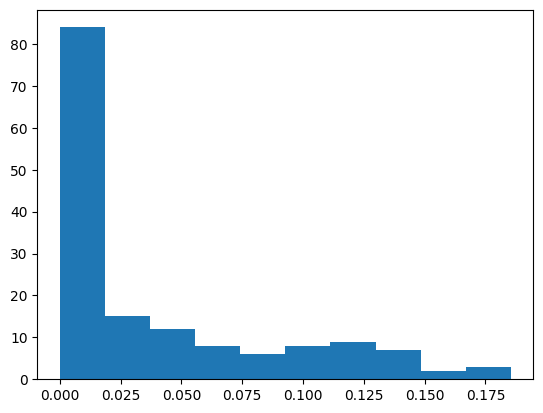

In [53]:
plt.hist(food_cluster_df['Deaths'])

Since the data to be used, which is `food_cluster_df['Deaths]`, has a non-normal distribution, as seen from the histogram. The researchers would be using `Krus-Wallis` instead of `One-way ANOVA`.

The `Kruskak-Wallis Test` is a non-parametric test and an `alternative` to One-Way Anova, which means that the data is not assumed to come from a particular distribution. The Kruskak-Wallis Test is used to determine whether there is a statistical difference among the medians of at least 3 groups. The medians to be used for the test would be coming from the 3 different clusters formed earlier.


  
With that said, the setup for the hypotheses is as follows:

`HO`: *The median is the same for all clusters*

`HA`: *At least one of the median in the cluster varies* 

Where the `level of significance` to be used for this test is `0.05`

The code below computes for the `Kruskal-Wallis value`

In [59]:
D0 = cluster_0['Deaths']
D1 = cluster_1['Deaths']
D2 = cluster_2['Deaths']

result = stats.kruskal(D0, D1, D2)
result

KruskalResult(statistic=115.95872033701971, pvalue=6.605167183655492e-26)

The p-value computed from the Kruskal-Wallis Test is `6.61e-26`, which is statistically significant to `reject the null hypothesis`. 

The data provides `strong evidence` that at least one of the median in the cluster varies under a significance level of 5%. In other words, since the *medians are not the same*, then their *variability should be high*. 

In [61]:
food_cluster_df

,Country,Obesity,Deaths,Animal Food Intake,Plant Food Intake,Cluster
0,Afghanistan,4.5,0.006186,Below Average,Above Average,1
1,Albania,22.3,0.050951,Above Average,Below Average,2
2,Algeria,26.6,0.006558,Below Average,Above Average,1
3,Angola,6.8,0.001461,Below Average,Above Average,1
4,Argentina,28.5,0.108227,Above Average,Below Average,0
...,...,...,...,...,...,...
149,Venezuela (Bolivarian Republic of),25.2,0.004287,Above Average,Below Average,1
150,Vietnam,2.1,0.000036,Below Average,Above Average,1
151,Yemen,14.1,0.002062,Below Average,Above Average,1
152,Zambia,6.5,0.004564,Below Average,Above Average,1


# Insights and Conclusions